# **Predicting Loan Defaults using ML model.**






# 1. Data Collection: Selection and get data




In [823]:
#Importing the libraries and dependencies required:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
from scipy.stats import chi2
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr, spearmanr

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from six import StringIO
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from category_encoders import *

from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
seed = 42

Get the Data
Use pandas to read lending_club_loan.csv as a dataframe called loans

In [705]:
#Loading and displaying the dataset:
df = pd.read_csv('/content/lending_club_loan_dataset2.csv')

## Feature description:
* **id:** Unique ID of the loan application.
* **grade:** LC assigned loan grade.
* **annual_inc:** The self-reported annual income provided by the borrower during registration.
* **short_emp:** 1 when employed for 1 year or less.
* **emp_length_num:** Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership: Type of home ownership.
* **dti (Debt-To-Income Ratio):** A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
* **purpose:** A category provided by the borrower for the loan request.
* **term:** The number of payments on the loan. Values are in months and can be either 36 or 60.
* **last_delinq_none:** 1 when the borrower had at least one event of delinquency.
* **last_major_derog_none:** 1 borrower had at least 90 days of a bad rating.
* **revol_util:** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* **total_rec_late_fee:** Late fees received to date.
* **od_ratio:** Overdraft ratio.
* **bad_loan:** 1 when a loan was not paid.

# 2. Data preparation

#  - Exploratory data analysis(EDA)

In [706]:
df.info

<bound method DataFrame.info of              id grade  annual_inc  ...  total_rec_late_fee  od_ratio bad_loan
0      11454641     A    100000.0  ...                 0.0  0.160624        0
1       9604874     A     83000.0  ...                 0.0  0.810777        0
2       9684700     D     78000.0  ...                 0.0  0.035147        1
3       9695736     D     37536.0  ...                 0.0  0.534887        1
4       9795013     D     65000.0  ...                 0.0  0.166500        0
...         ...   ...         ...  ...                 ...       ...      ...
19995   6595657     B     27000.0  ...                 0.0  0.821782        1
19996   1576331     B     45000.0  ...                 0.0  0.652200        0
19997   6645736     B    104000.0  ...                 0.0  0.482555        0
19998   6625736     A     38400.0  ...                 0.0  0.822980        0
19999   6625685     B    150000.0  ...                 0.0  0.201388        0

[20000 rows x 15 columns]>

 The dataset has 20000 rows and 15 columns .

In [707]:
df.head(3)

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1


In [708]:
# Type of variables:
df.dtypes.sort_values(ascending=True)

id                         int64
short_emp                  int64
emp_length_num             int64
last_delinq_none           int64
bad_loan                   int64
annual_inc               float64
dti                      float64
last_major_derog_none    float64
revol_util               float64
total_rec_late_fee       float64
od_ratio                 float64
grade                     object
home_ownership            object
purpose                   object
term                      object
dtype: object

In [709]:
# Couting variables by type:
df.dtypes.value_counts()

float64    6
int64      5
object     4
dtype: int64

The dataset has 20000 observations and 15 variables including the target, divided into 11 numeric and 4 categoric features.

In [710]:
#Main stats of numeric attributes:
df.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


From the difference between the mean and the median, and also the distance of maximum values of the variables ‘annual_inc’, ‘revol_util’ and ‘total_rec_late_fee’, it seems there are some outliers.


In [711]:
# Main stats of categoric attributes:

df.describe(include=[np.object])

,grade,home_ownership,purpose,term
count,20000,18509,20000,20000
unique,7,3,12,3
top,B,MORTGAGE,debt_consolidation,36 months
freq,6042,9844,12337,14969


In [712]:
df.isnull().sum()

id                           0
grade                        0
annual_inc                   0
short_emp                    0
emp_length_num               0
home_ownership            1491
dti                        154
purpose                      0
term                         0
last_delinq_none             0
last_major_derog_none    19426
revol_util                   0
total_rec_late_fee           0
od_ratio                     0
bad_loan                     0
dtype: int64

In [713]:
data = pd.DataFrame(df)

In [714]:
# Checking for missing values:
nulval = data.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent %"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent %
id,0,0.00
grade,0,0.00
annual_inc,0,0.00
short_emp,0,0.00
emp_length_num,0,0.00
home_ownership,1491,7.08
dti,154,0.73
purpose,0,0.00
term,0,0.00
last_delinq_none,0,0.00


There are variables with missing values: (home_ownership) with 7.08%, (dti) with 0.73%, and (last_major_derog_none) with 92.19%. ????

In [715]:
# Checking data balance/proportion
loan = data.bad_loan.value_counts().to_frame().rename(columns={"bad_loan":"absolute"})
loan["percent"] = (loan.apply(lambda x: x/x.sum()*100).round(2))
display(loan)


,absolute,percent
0,16000,80.0
1,4000,20.0


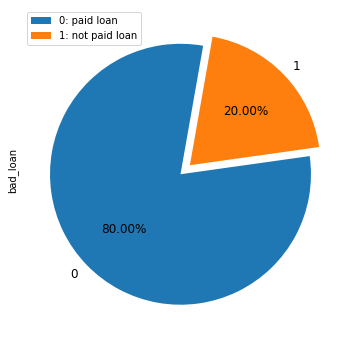

In [716]:
# pie chart
data.bad_loan.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: paid loan","1: not paid loan"]);


20% not-paid loan --> default results (value 1)


80% paid loan --> (value 0)



In [717]:
#Type of variables
data.dtypes.sort_values(ascending=True)

id                         int64
short_emp                  int64
emp_length_num             int64
last_delinq_none           int64
bad_loan                   int64
annual_inc               float64
dti                      float64
last_major_derog_none    float64
revol_util               float64
total_rec_late_fee       float64
od_ratio                 float64
grade                     object
home_ownership            object
purpose                   object
term                      object
dtype: object

In [718]:
# Couting variables by type
data.dtypes.value_counts()

float64    6
int64      5
object     4
dtype: int64

In [719]:
# Checking for missing values
nulval = data.isnull().sum().to_frame().rename(columns={0:"absolute"})
nulval["percent"] = (nulval.apply(lambda x: x/x.sum())*100).round(2)
nulval

,absolute,percent
id,0,0.00
grade,0,0.00
annual_inc,0,0.00
short_emp,0,0.00
emp_length_num,0,0.00
home_ownership,1491,7.08
dti,154,0.73
purpose,0,0.00
term,0,0.00
last_delinq_none,0,0.00


## EDA functions



Describing all the features in the dataset using and abusing graphics. Start by defining a few functions for every chart: boxplot, histograms, bar and pie charts, scatterplots, pivot charts, as well as a statistic descriptions.

In [720]:
# Variable vs. target chart
def target(x):
    short_0 = data[data.bad_loan == 0].loc[:,x]
    short_1 = data[data.bad_loan == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [721]:
#Boxplot + Hist chart
def boxhist(x):
    variable = data[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()


In [722]:
# Pie chart
def pie(x):
    data[x].value_counts(dropna=False).plot(kind='pie', figsize=(6,5), fontsize=10, autopct='%1.1f%%', startangle=0, legend=True, textprops={'color':"white", 'weight':'bold'});
# Number of observations by class
    obs = data[x].value_counts(dropna=False)
    o = pd.DataFrame(obs)
    o.rename(columns={x:"Freq abs"}, inplace=True)
    o_pc = (data[x].value_counts(normalize=True) * 100).round(2)
    obs_pc = pd.DataFrame(o_pc)
    obs_pc.rename(columns={x:"percent %"}, inplace=True)
    obs = pd.concat([o,obs_pc], axis=1)
    display(obs)

In [723]:
# Bar chart
def bar(x):
    ax = data[x].value_counts().plot(kind="bar", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.xlabel(x, fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel("Absolute values", fontsize=10)
    plt.title(x, fontsize=10, loc="right")

In [724]:
# Pivot_table_mean
def pivot_mean(a, b, c):
    type_pivot_mean = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.mean)
    display(type_pivot_mean)
# Display pivot_table
    type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);
# Pivot_table_sum
def pivot_sum(a, b, c):
    type_pivot_sum = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    display(type_pivot_sum)
# Display pivot_table
    type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);


## Visualization of the numeric distribution

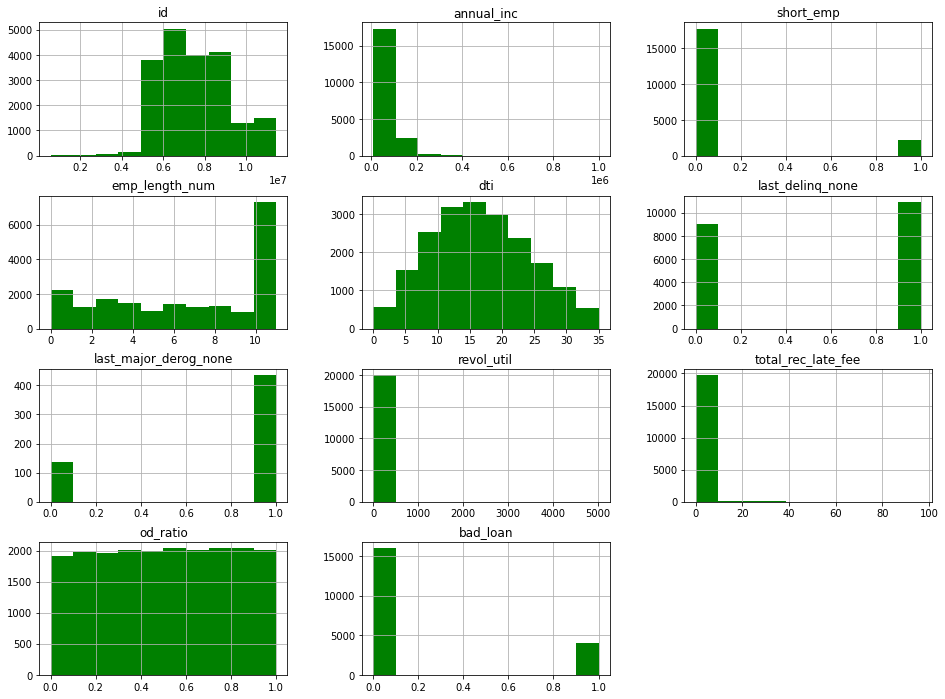

In [725]:
data.hist(bins=10 ,figsize=(16,12), color = 'Green')
plt.show()

## Visualization of the categoric distribution

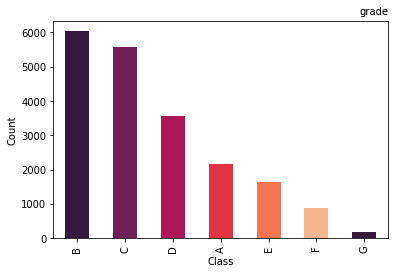

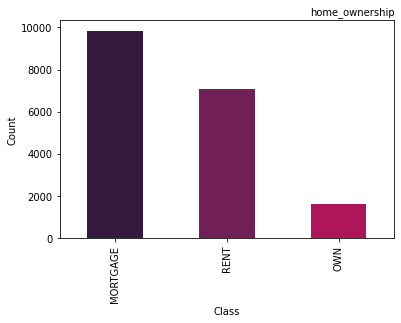

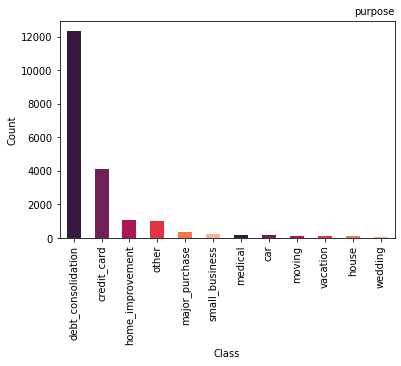

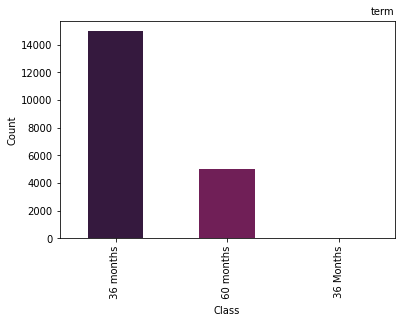

In [726]:
for col in data.select_dtypes(include=["object"]).columns:
    data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

In [727]:
#It seems there is a typo in the ’36 Months’ class on the variable ‘term’.
# Let’s fix it by lowering the capitalized characters
data.term = data.term.str.lower()
data.term.value_counts()

 36 months    15001
 60 months     4999
Name: term, dtype: int64

###Feature: grade
#####LC assigned loan grade.

In [728]:
stats("grade")

Variable: grade
Type of variable: object
Total observations: 20000
Missing values? False
Unique values: 7
List of unique values: ['A' 'D' 'E' 'B' 'G' 'C' 'F']


In [729]:
#bar("grade")

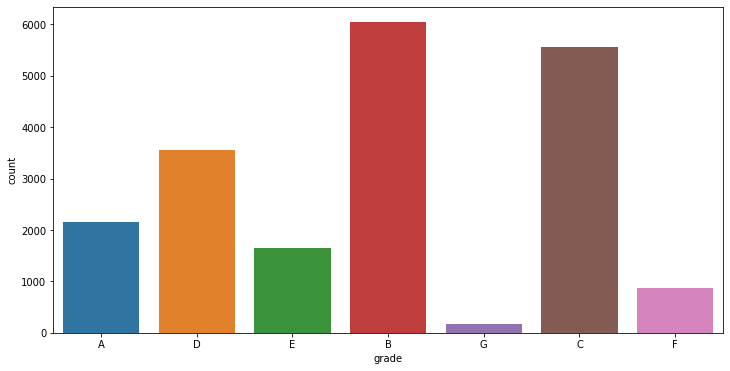

In [730]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='grade')

home_ownership,MORTGAGE,OWN,RENT
grade,,,
A,10125413622,1317629640,4051026441
B,23885885410,3462708590,14760476369
C,20610251432,3556938433,15150732416
D,11302570597,2341863113,11151017359
E,5710749816,1018416369,4929639589
F,2609177317,666981482,2724192127
G,536342691,109804609,529908890


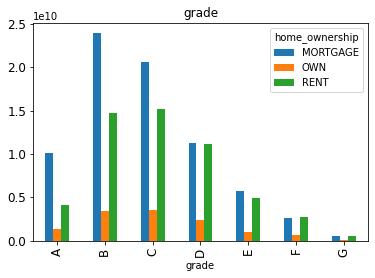

In [731]:
pivot_sum("home_ownership","grade","id")

When the grade classes decrease, the type of homeownership tends to shift from mortgage to rent. It is on grades B, C, and D that we see the type of own propriety as the highest class.

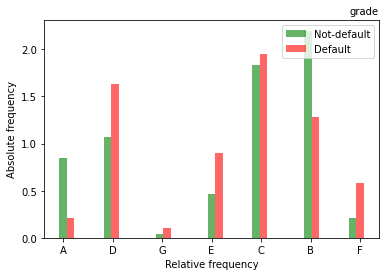

In [732]:
target("grade")

It is between the upper-grade classes that the highest not-default loans happen.

### Feature: annual_inc
#### The self-reported annual income provided by the borrower during registration.

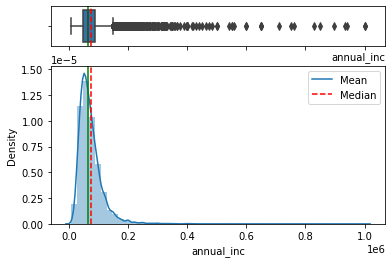

In [733]:
boxhist("annual_inc")

In [734]:
stats("annual_inc")

Variable: annual_inc
Type of variable: float64
Total observations: 20000
Missing values? False
Unique values: 2566
Min: 8412
25%: 47000
Median: 65000
75%: 88000
Max: 1000000
Mean: 73349.57835
Std dev: 45198.56725472537
Variance: 2042910481.8799326
Skewness: 5.275648123592321
Kurtosis: 66.72665803201564

Percentiles 1%, 5%, 95%, 99%


0.01     20519.5
0.05     30000.0
0.95    145000.0
0.99    225000.0
Name: annual_inc, dtype: float64

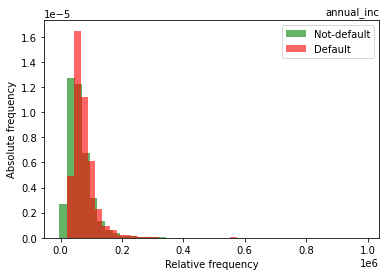

In [735]:
target("annual_inc")

The histogram tells us that the higher the income, the higher is the trend of default.


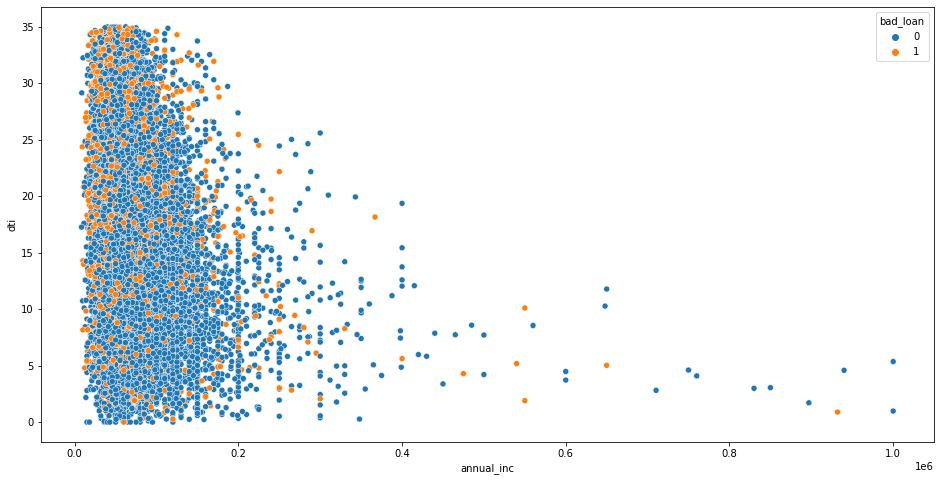

In [736]:
data_scat = data[['dti', 'annual_inc', 'bad_loan']].copy()
plt.figure(figsize = (16,8))
sns.scatterplot(data = data_scat, x = 'annual_inc', y = 'dti', hue = 'bad_loan')
plt.show()

The scatterplot shows a weak and negative association between ‘annual income’ and ‘debt to income ratio’.

 ### Feature: short_emp

 1 when employed for 1 year or less.

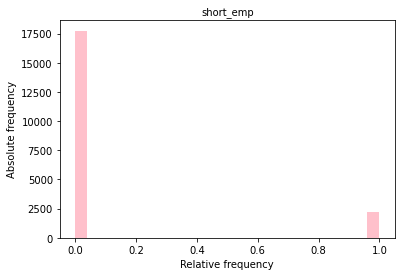

In [737]:
    plt.hist(data["short_emp"], bins=25,color="pink")
    plt.title("short_emp", fontsize=10)
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

The clients that have been employed for one or less years (instance 1) represent 11.25% whereas 88.75% of the clients were employed for more than 1 year.

In [738]:
stats("short_emp")

Variable: short_emp
Type of variable: int64
Total observations: 20000
Missing values? False
Unique values: 2
Min: 0
25%: 0
Median: 0
75%: 0
Max: 1
Mean: 0.1125
Std dev: 0.3159885163057429
Variance: 0.09984874243710473
Skewness: 2.4526820936006293
Kurtosis: 4.015649452269171

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    1.0
0.99    1.0
Name: short_emp, dtype: float64

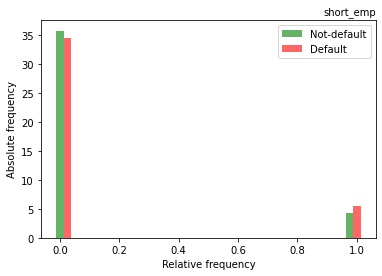

In [739]:
target("short_emp")

The segment employed for less than 1 year had loans on default more frequently than the other segment.

### Feature: emp_length_num

Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

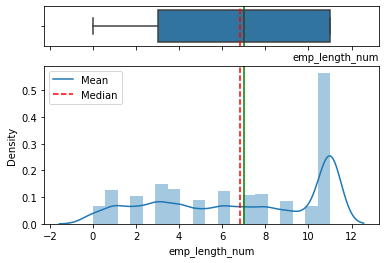

In [740]:
boxhist("emp_length_num")

In [741]:
stats("emp_length_num")

Variable: emp_length_num
Type of variable: int64
Total observations: 20000
Missing values? False
Unique values: 12
Min: 0
25%: 3
Median: 7
75%: 11
Max: 11
Mean: 6.8214
Std dev: 3.7742302898357223
Variance: 14.24481428071344
Skewness: -0.27964924120655704
Kurtosis: -1.3664296257576731

Percentiles 1%, 5%, 95%, 99%


0.01     0.0
0.05     1.0
0.95    11.0
0.99    11.0
Name: emp_length_num, dtype: float64

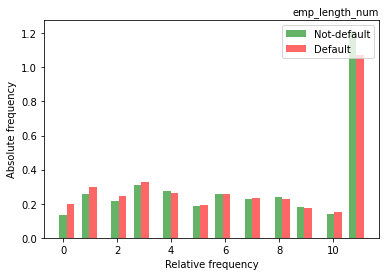

In [742]:
target("emp_length_num")

With a few exceptions, it’s amongst nonstop employed clients for more than 10 years that the not-default loans occur.

bad_loan,0,1
purpose,,
car,5.760870,4.500000
credit_card,6.715284,6.357550
debt_consolidation,7.028006,6.603143
home_improvement,7.073281,6.870813
house,5.802326,4.933333
major_purchase,6.269625,6.081395
medical,6.904412,6.435897
moving,5.827957,4.133333
other,6.803213,6.609489


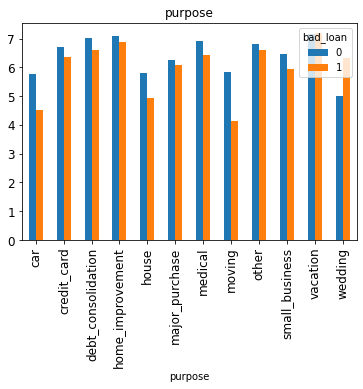

In [743]:
pivot_mean("bad_loan", "purpose", "emp_length_num")

Wedding and vacation are the two purposes in which, on average, the majority of loans ended up not been paid.

### Feature: home_ownership
Type of home ownership.


In [744]:
stats("home_ownership")

Variable: home_ownership
Type of variable: object
Total observations: 20000
Missing values: 1491 (7.46%)
Unique values: 3
List of unique values: ['RENT' 'OWN' 'MORTGAGE' nan]


Text(0.5, 1.0, 'home_ownership')

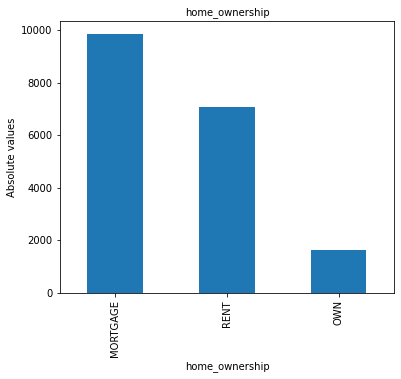

In [745]:
#bar("home_ownership")

data["home_ownership"].value_counts().plot(kind="bar", figsize=(6,5), fontsize=10, table=False)
plt.xlabel("home_ownership", fontsize=10)
plt.ylabel("Absolute values", fontsize=10)
plt.title("home_ownership", fontsize=10, loc="center")

,Freq abs,percent %
MORTGAGE,9844,53.18
RENT,7052,38.10
OWN,1613,8.71
NaN,1491,NaN


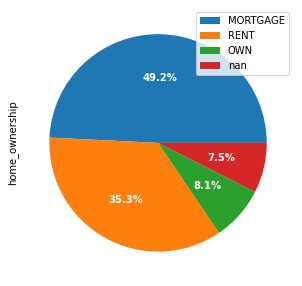

In [746]:
 pie("home_ownership")

bad_loan,0,1
home_ownership,,
MORTGAGE,62024618628,12755772257
OWN,10069692998,2404649238
RENT,40735387375,12561605816


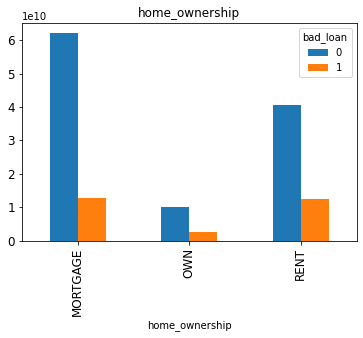

In [747]:
pivot_sum("bad_loan", "home_ownership", "id")

Proportionally, there is no major difference between the type of homeownership and the default loans.

### Feature: dti (debt-to-income)
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

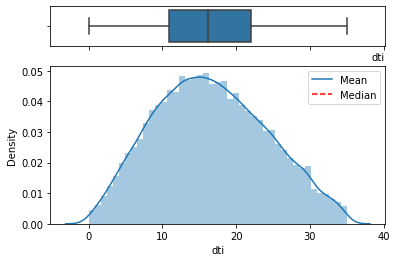

In [748]:
boxhist("dti")

In [749]:
stats("dti")

Variable: dti
Type of variable: float64
Total observations: 20000
Missing values: 154 (0.77%)
Unique values: 3295
Min: 0
25%: 10
Median: 16
75%: 22
Max: 34
Mean: 16.58784137861536
Std dev: 7.585811951545168
Variance: 57.544542964205505
Skewness: nan
Kurtosis: nan

Percentiles 1%, 5%, 95%, 99%


0.01     1.7800
0.05     4.6500
0.95    29.6900
0.99    33.4355
Name: dti, dtype: float64

Text(0.5, 1.0, 'Debt-To-Income Ratio Distribution')

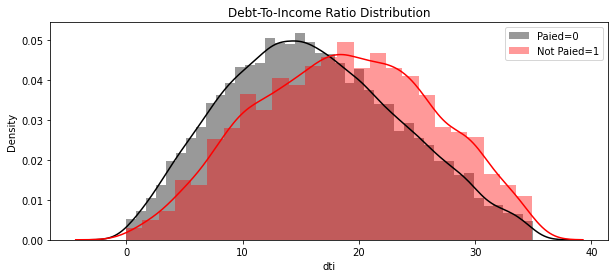

In [750]:
#target("dti")
plt.figure(figsize=(10,4))
sns.distplot(data[data["bad_loan"] == 0]['dti'], color = 'black',label='Paied=0')
sns.distplot(data[data["bad_loan"] == 1]['dti'], color = 'red',label='Not Paied=1')
plt.legend()
plt.title("Debt-To-Income Ratio Distribution")

The distribution of bad loans (default) has, on average, higher ‘dti’ values (debt to income ratio) in comparison with the good loans. The trend is: the higher the effort rate, the more frequently are the loans on default.

home_ownership,MORTGAGE,OWN,RENT
purpose,,,
car,863.18,362.36,837.01
credit_card,33224.36,5383.50,25230.23
debt_consolidation,103013.35,16068.56,74421.50
home_improvement,10866.29,2020.66,922.21
house,386.92,134.76,718.56
major_purchase,2081.56,519.82,2204.26
medical,1186.83,194.44,1047.97
moving,280.34,122.21,1236.81
other,6840.32,1656.78,6584.84


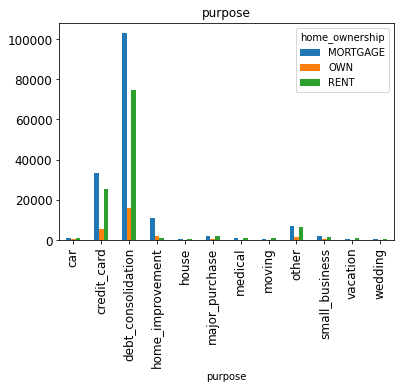

In [751]:
pivot_sum("home_ownership", "purpose", "dti")

It is notorious that the main purpose for the requested loans is ‘debt consolidation’ followed by ‘credit card’, for ‘mortage’ and ‘own’ as types of home ownership by more than 6000 and 4000 people respectivelly.
On the other hand, ‘moving’ and ‘wedding’ and the purpose less declared by 19 and 47 in both same segments of type of ownership. For those who live in a rented place, the number of people who requests loans is substancially inferior, proporcionally.

bad_loan,0,1
grade,,
A,28585.16,2130.11
B,81890.81,13859.61
C,72020.76,21883.30
D,43094.93,18423.00
E,18820.49,10220.30
F,8621.77,6686.74
G,1752.69,1212.63


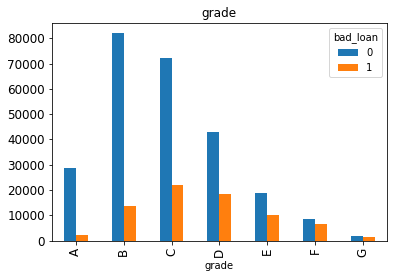

In [752]:
pivot_sum("bad_loan", "grade", "dti")

The trend is when the grade classes decrease, the probability of a default loan increases.

### Feature: purpose
A category provided by the borrower for the loan request.

In [753]:
stats("purpose")

Variable: purpose
Type of variable: object
Total observations: 20000
Missing values? False
Unique values: 12
List of unique values: ['credit_card' 'debt_consolidation' 'medical' 'other' 'home_improvement'
 'small_business' 'major_purchase' 'vacation' 'car' 'house' 'moving'
 'wedding']


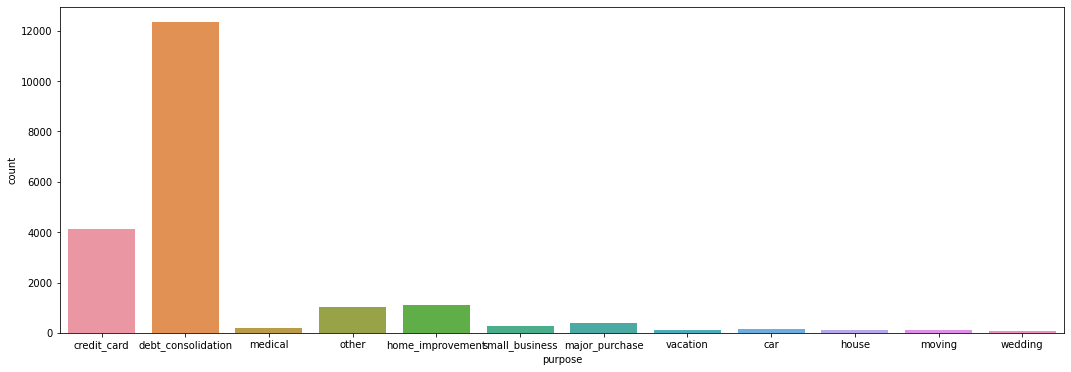

In [754]:
#barh("purpose")
plt.figure(figsize=(18,6))
sns.countplot(data=data, x='purpose')

bad_loan,0,1
purpose,,
car,1070129314,216325988
credit_card,26386780714,5340476464
debt_consolidation,75102879435,18555640551
home_improvement,6644887055,1502903381
house,637766829,103586113
major_purchase,2178415440,660763827
medical,1073061905,307640771
moving,701823712,219651796
other,5725665050,1988147906


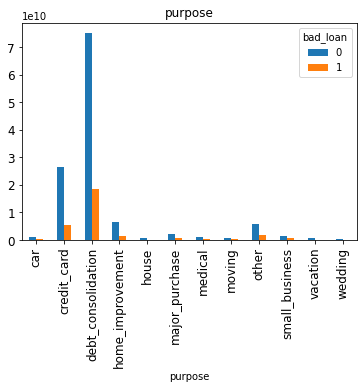

In [755]:
pivot_sum("bad_loan", "purpose", "id")

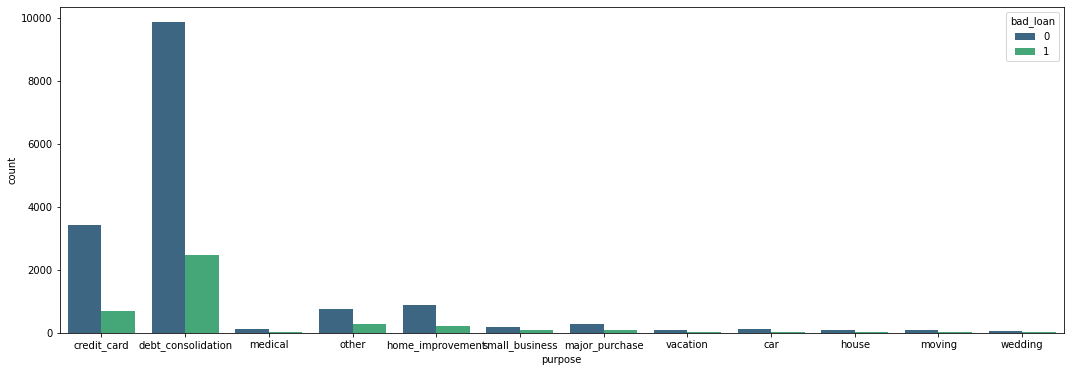

In [756]:
plt.figure(figsize=(18,6))
sns.countplot(x='purpose', data=data, palette='viridis', hue='bad_loan')

### Feature: term
The number of payments on the loan. Values are in months and can be either 36 or 60.

,Freq abs,percent %
36 months,15001,75.0
60 months,4999,25.0


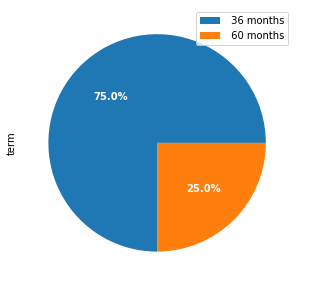

In [757]:
pie("term")

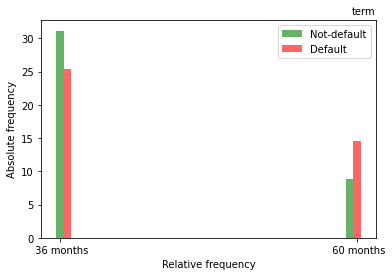

In [758]:
target("term")

Default loans occur inversely and more frequently over a 60 months term period.

term,36 months,60 months
grade,,
A,83456.905553,89204.942308
B,71353.945618,80193.794444
C,68697.487576,77522.113440
D,65478.678457,80732.477486
E,69688.921136,80009.862512
F,72240.582734,77307.279614
G,122857.142857,89206.913580


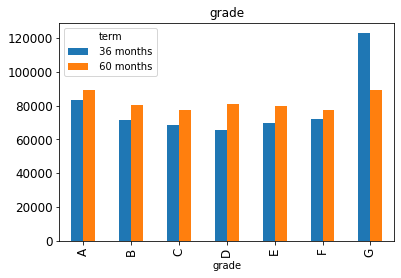

In [759]:
pivot_mean("term", "grade", "annual_inc")

On average, the 36 months term is the most common amongst clients with the highest debt-to-income that belong to the lowest grade class.

### Feature: last_delinq_none
1 when the borrower had at least one event of delinquency

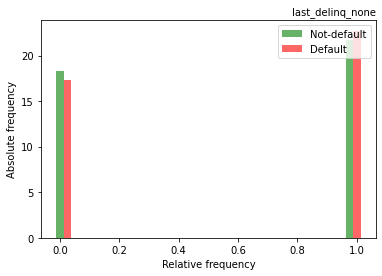

In [760]:
target("last_delinq_none")

,Freq abs,percent %
1,10932,54.66
0,9068,45.34


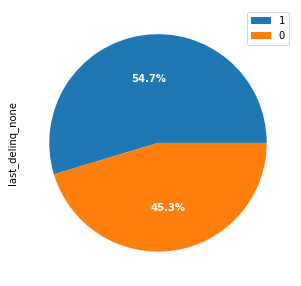

In [761]:
pie("last_delinq_none")

In [762]:
stats("last_delinq_none")

Variable: last_delinq_none
Type of variable: int64
Total observations: 20000
Missing values? False
Unique values: 2
Min: 0
25%: 0
Median: 1
75%: 1
Max: 1
Mean: 0.5466
Std dev: 0.49783614979391533
Variance: 0.24784083204162968
Skewness: -0.18721487004502552
Kurtosis: -1.9649505924340243

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    1.0
0.99    1.0
Name: last_delinq_none, dtype: float64

bad_loan,0,1
purpose,,
car,0.615942,0.433333
credit_card,0.578748,0.599715
debt_consolidation,0.529072,0.566479
home_improvement,0.524239,0.516746
house,0.558140,0.733333
major_purchase,0.569966,0.511628
medical,0.514706,0.487179
moving,0.602151,0.566667
other,0.514056,0.569343


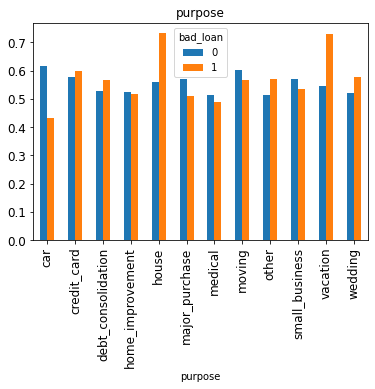

In [763]:
pivot_mean("bad_loan","purpose","last_delinq_none")

Loans on default are, on average, the more frequent between loans’ purposes such as vacation and house.

### Feature: last_major_derog_none
1 borrower had at least 90 days of a bad rating.

In [764]:
## برأيي مانعمل دراسة لهذا العمود ابداااا 

### Feature: revol_util
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.



In [765]:
stats("revol_util")

Variable: revol_util
Type of variable: float64
Total observations: 20000
Missing values? False
Unique values: 1030
Min: 0
25%: 38
Median: 57
75%: 73
Max: 5010
Mean: 55.95814805499972
Std dev: 42.117455872216155
Variance: 1773.880089148075
Skewness: 81.32716395041949
Kurtosis: 9569.242123791564

Percentiles 1%, 5%, 95%, 99%


0.01     2.699
0.05    14.500
0.95    91.800
0.99    97.300
Name: revol_util, dtype: float64

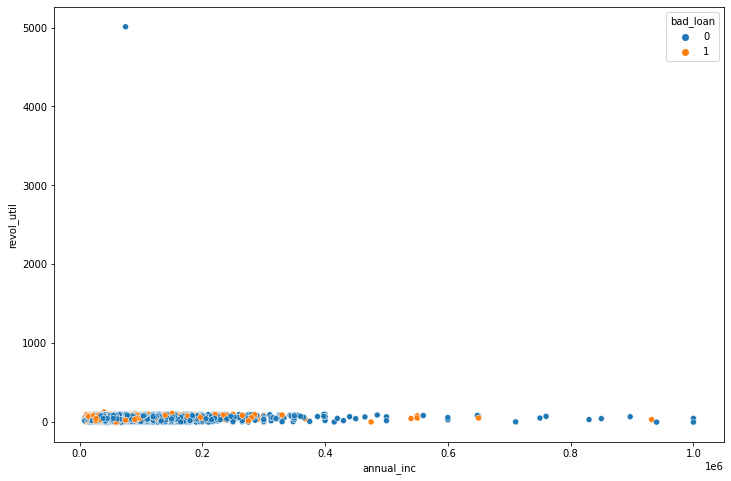

In [766]:
data_scat = data[['annual_inc', 'revol_util', 'bad_loan']].copy()
plt.figure(figsize = (12,8))
sns.scatterplot(data = data_scat, x = 'annual_inc', y = 'revol_util', hue = 'bad_loan')
plt.show()

The lowest the clients’ annual income, the highest the amount of credit the borrower is using relative to all available revolving credit.

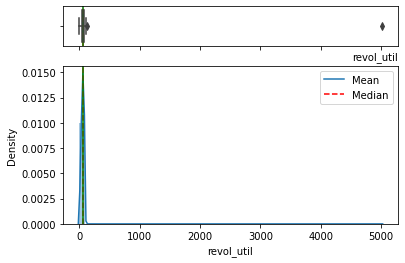

In [767]:
boxhist("revol_util")

### Feature: total_rec_late_fee
Late fees received to date.

In [768]:
stats("total_rec_late_fee")

Variable: total_rec_late_fee
Type of variable: float64
Total observations: 20000
Missing values? False
Unique values: 166
Min: 0
25%: 0
Median: 0
75%: 0
Max: 96
Mean: 0.29062163999999996
Std dev: 3.1086544166442467
Variance: 9.663732282121781
Skewness: 14.299156408331024
Kurtosis: 262.30322072057277

Percentiles 1%, 5%, 95%, 99%


0.01     0.0
0.05     0.0
0.95     0.0
0.99    15.0
Name: total_rec_late_fee, dtype: float64

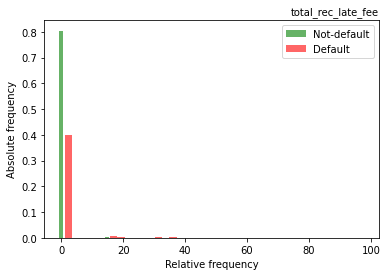

In [769]:
target("total_rec_late_fee")

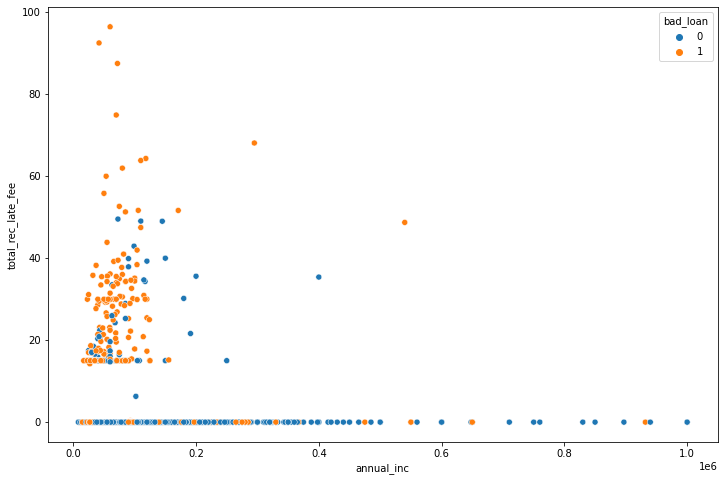

In [770]:
data_scat = data[['annual_inc', 'total_rec_late_fee', 'bad_loan']].copy()
plt.figure(figsize = (12,8))
sns.scatterplot(data = data_scat, x = 'annual_inc', y = 'total_rec_late_fee', hue = 'bad_loan')
plt.show()

bad_loan,0,1
purpose,,
car,0.000000,0.000000
credit_card,0.087120,0.754202
debt_consolidation,0.067130,1.087271
home_improvement,0.146776,1.556608
house,0.174419,6.594467
major_purchase,0.254948,0.871894
medical,0.110294,1.460797
moving,0.161290,0.999413
other,0.080293,1.120423


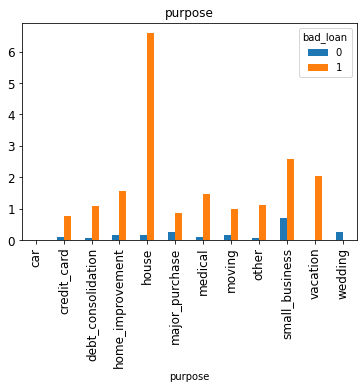

In [771]:
pivot_mean("bad_loan", "purpose", "total_rec_late_fee")

The late fees occur in a higher frequency amongst loan purposes such as a house, small business, or vacation. On the other hand, wedding and car are the credit purposes with the lowest late fees execution.

### Feature: od_ratio
Overdraft ratio.


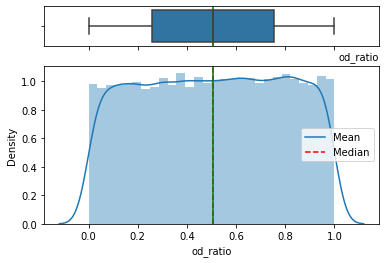

In [772]:
boxhist("od_ratio")

In [773]:
stats("od_ratio")

Variable: od_ratio
Type of variable: float64
Total observations: 20000
Missing values? False
Unique values: 20000
Min: 0
25%: 0
Median: 0
75%: 0
Max: 0
Mean: 0.5044303048872487
Std dev: 0.2877201586666063
Variance: 0.0827828897031371
Skewness: -0.02052095981509419
Kurtosis: -1.1914529752985776

Percentiles 1%, 5%, 95%, 99%


0.01    0.009887
0.05    0.051495
0.95    0.951616
0.99    0.990142
Name: od_ratio, dtype: float64

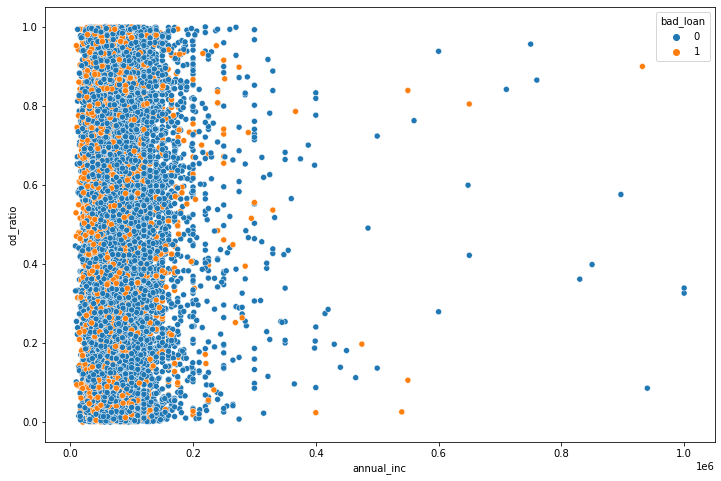

In [774]:
data_scat = data[['annual_inc', 'od_ratio', 'bad_loan']].copy()
plt.figure(figsize = (12,8))
sns.scatterplot(data = data_scat, x = 'annual_inc', y = 'od_ratio', hue = 'bad_loan')
plt.show()

There is a higher overdraft rate between clients with the lowest annual income, the same applicants involved with the most frequent defaulted loans.

bad_loan,0,1
term,,
36 months,6292.986498,1278.090039
60 months,1776.969682,740.559880


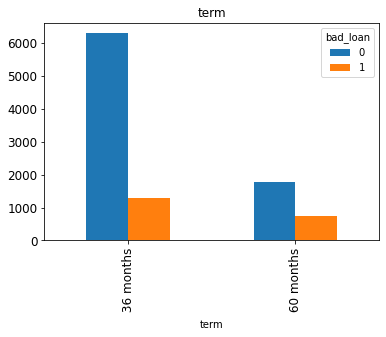

In [775]:
pivot_sum("bad_loan", "term", "od_ratio")

Proportionally, overdraft ratios are higher on a 60-month term amongst defaulted loans.

### Feature: bad_loan
1 when a loan was not paid.

In [776]:
stats("bad_loan")

Variable: bad_loan
Type of variable: int64
Total observations: 20000
Missing values? False
Unique values: 2
Min: 0
25%: 0
Median: 0
75%: 0
Max: 1
Mean: 0.2
Std dev: 0.40001000037498174
Variance: 0.16000800039999288
Skewness: 1.4999999999999996
Kurtosis: 0.24999999999999956

Percentiles 1%, 5%, 95%, 99%


0.01    0.0
0.05    0.0
0.95    1.0
0.99    1.0
Name: bad_loan, dtype: float64

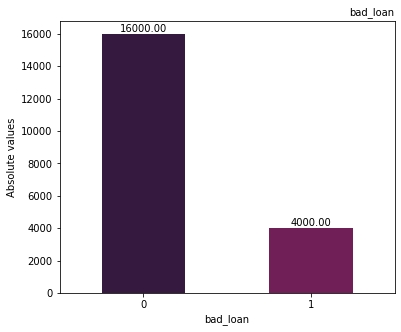

In [777]:
bar("bad_loan")

## Correlations

In [778]:
data.corr()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
id,1.000000,0.017971,0.015413,0.003863,0.006407,-0.034091,-0.051439,-0.006106,-0.014203,0.000465,-0.037307
annual_inc,0.017971,1.000000,-0.099317,0.118024,-0.230219,-0.080378,0.023281,0.016951,0.014713,-0.004953,-0.092402
short_emp,0.015413,-0.099317,1.000000,-0.582580,0.002013,0.030880,0.072290,-0.011014,0.010424,-0.005309,0.037186
emp_length_num,0.003863,0.118024,-0.582580,1.000000,0.009369,-0.053371,-0.158177,0.027390,-0.012382,0.004446,-0.041420
dti,0.006407,-0.230219,0.002013,0.009369,1.000000,0.030379,0.004079,0.098673,0.011072,0.005571,0.141884
last_delinq_none,-0.034091,-0.080378,0.030880,-0.053371,0.030379,1.000000,0.603267,0.013373,-0.011000,-0.001996,0.021494
last_major_derog_none,-0.051439,0.023281,0.072290,-0.158177,0.004079,0.603267,1.000000,-0.027597,-0.086395,0.050211,-0.013770
revol_util,-0.006106,0.016951,-0.011014,0.027390,0.098673,0.013373,-0.027597,1.000000,0.008435,-0.008228,0.053682
total_rec_late_fee,-0.014203,0.014713,0.010424,-0.012382,0.011072,-0.011000,-0.086395,0.008435,1.000000,-0.002354,0.130233
od_ratio,0.000465,-0.004953,-0.005309,0.004446,0.005571,-0.001996,0.050211,-0.008228,-0.002354,1.000000,0.000403


### Heatmap → Pearson method and Spearman method

The heatmap shows there are some positive and negative correlations amongst variables.


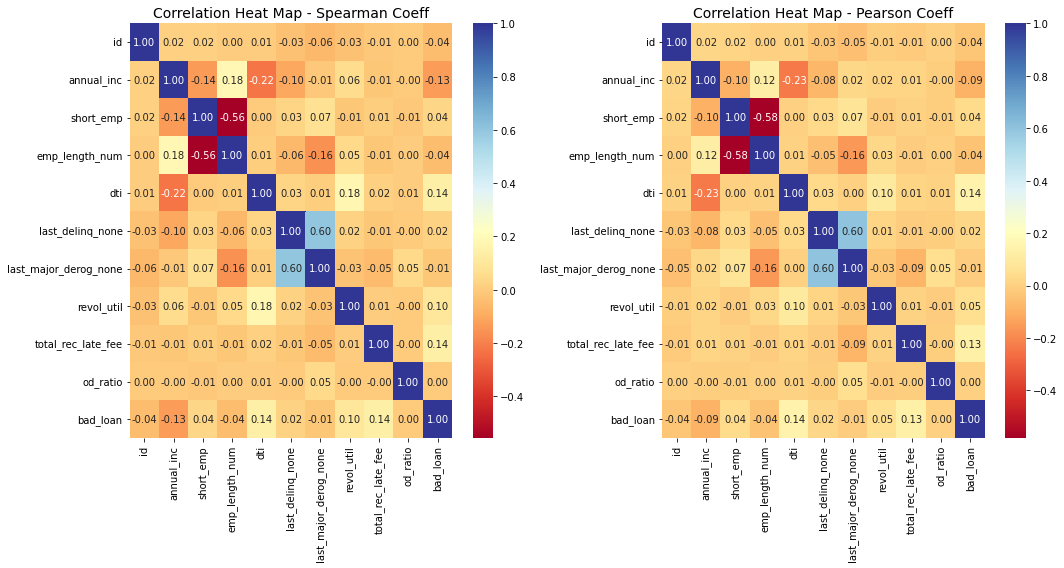

In [779]:
fig = plt.figure(figsize = (15,8))
ax1 = plt.subplot(121)
sns.heatmap(data.corr('spearman'), annot = True, fmt = ".2f", cmap = "RdYlBu")
plt.title("Correlation Heat Map - Spearman Coeff", fontsize = 14)

ax2 = plt.subplot(122)
sns.heatmap(data.corr('pearson'), annot = True, fmt = ".2f", cmap = "RdYlBu")
plt.title("Correlation Heat Map - Pearson Coeff", fontsize = 14)
plt.tight_layout()
plt.show()


**Pearson Method**

In Pearson Method, we look at numerical features are the most correlated with the *target*.

The variable that is most correlated with the target is ‘dti’ with a weak and positive correlation of 0.141884.

**Spearman Method**

In spearman method, it’s easy to understand that the variables ‘last_major_derog_none’ and ‘last_delinq_none’ are the two most correlated features with the highest monotonic relationship (60%). Nevertheless, ‘last_major_derog_none’ has 19426 missing values (97%), which is too much.

In this scenario, the column ‘last_major_derog_none’ is to be dropped as well as all the nan values from the dataset. Thus, the next most correlated variables would be ‘emp_length_num’ and ‘short_emp’, with a Spearman value of -55%.

